# USA Real Estate Dataset Models | Data Science
Larry Serratos X

### Objective

For this dataset it will be applied different data science and machine learning techniques in order to predict housing prices. The data is alredy clean, the original was taken from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('cleandata.xlsx')
data

,status,bed,bath,acre_lot,zip_code,house_size,price
0,1,3,2,0.12,601,920,105000
1,1,4,2,0.08,601,1527,80000
2,1,2,1,0.15,795,748,67000
3,1,4,2,0.10,731,1800,145000
4,1,4,3,0.46,612,2520,179000
...,...,...,...,...,...,...,...
207475,1,3,2,0.23,32164,1552,309990
207476,1,4,3,0.32,32164,3043,589000
207477,1,4,2,0.23,32164,2348,525000
207478,1,3,2,0.29,32164,1399,345000


Here we can see that we do not have missing values for the 7 columns which are:

* status (Housing status - 1 ready for sale or 0 ready to build)
* bed (# of beds)
* bath (# of bathrooms)
* acre_lot (Property / Land size in acres)
* zip_code (postal code of the area)
* house_size (house area/size/living space in square feet)

* price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)

In [ ]:
data.describe()

,status,bed,bath,acre_lot,zip_code,house_size,price
count,207480.0,207480.000000,207480.000000,207480.000000,207480.000000,207480.000000,2.074800e+05
mean,1.0,3.582875,2.711379,19.366481,20005.052810,2285.290708,5.744305e+05
std,0.0,1.359698,1.390016,995.410601,9561.411797,2109.109427,1.103338e+06
min,1.0,1.000000,1.000000,0.000000,601.000000,100.000000,1.000000e+00
25%,1.0,3.000000,2.000000,0.140000,12182.000000,1404.000000,2.300000e+05
50%,1.0,3.000000,2.000000,0.280000,20653.000000,1912.000000,3.650000e+05
75%,1.0,4.000000,3.000000,0.750000,28748.000000,2670.000000,5.960000e+05
max,1.0,54.000000,43.000000,100000.000000,95652.000000,400149.000000,6.500000e+07


In [ ]:
#Missing Values

data.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
price         0
dtype: int64

As we can see there are not missing values, so we can continue with the Machine Learning Models.

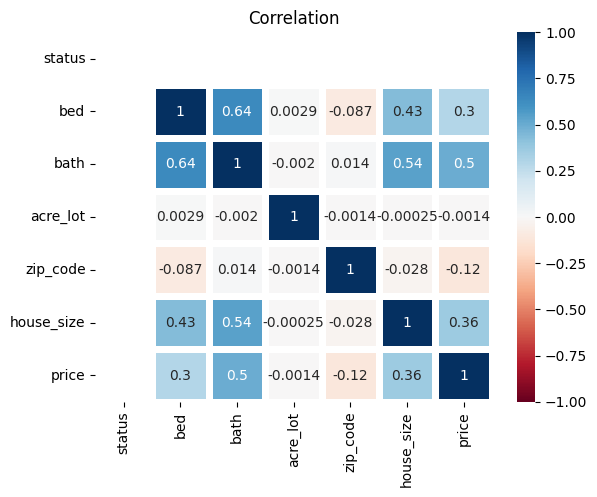

In [ ]:
sns.heatmap(data=data.corr(),cmap='RdBu',linewidth=5,annot=True,vmin=-1,vmax=1)
plt.title('Correlation')
plt.show()

With this plot we can easily see that exists a direct relation between price and number of bath, this will be useful in our model.

## 1. KNN

KNN (K-Nearest Neighbors) is a machine learning algorithm that predicts the classification or value of a new data point by considering the majority class or average value of its nearest neighbors in the feature space.


The first step is to split data, it is necessary to separate the price from the others variables.

In [ ]:
X = data.drop(['price','status'],axis=1)
y = data['price']

For the test and train the variables used are:

* Bed
* Bath
* acre_lot
* zip_code
* house_size

Then we need to split data in training and test data, 80% for trining data and 20% for test data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize kNN classifier
knn = KNeighborsRegressor(n_neighbors=10)

# Train the classifier on the scaled training data
knn.fit(X_train, y_train)

# Predict on the scaled test data
y_pred = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print("RMSE for KNN : ", round(np.sqrt(mse_knn),2))
print("R2 for KNN   : ", round(r2_knn,4))

RMSE for KNN :  869620.71
R2 for KNN   :  0.4518


## 2. Random Forest Regression

Random Forest Regression is an ensemble learning technique used for regression tasks. It builds multiple decision trees during training and averages their predictions to reduce overfitting and improve accuracy. Each tree is trained on a random subset of the training data and a random subset of features, resulting in a robust and flexible model capable of handling non-linear relationships and high-dimensional data.

In [ ]:
X = data.drop(['price','status'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

rf_score = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

print("RMSE : ", round(np.sqrt(mse_rf),2))
print('R2   : ',round(rf_score,4))

RMSE :  726536.2
R2   :  0.6173


## 3. Linnear Regression

This method models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

In this case the data is divided by number of beds in the house in differents data frames and by house size, in order to avoid outliers.

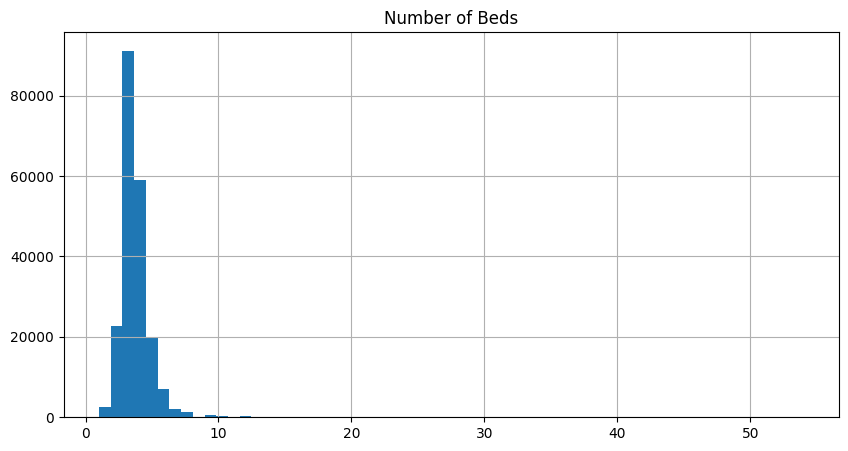

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['bed'], bins=60)
plt.title('Number of Beds')
plt.grid()
plt.show()

In [ ]:
bt = [3,5,8,10,12,17,20]

df1 = data[data['bed'] == 1]
dfb1 = df1[df1['house_size'] <= np.mean(df1['house_size'])]
dfb2 = df1[df1['house_size'] > np.mean(df1['house_size'])]
df2 = data[data['bed'] == 2]
dfb3 = df2[df2['house_size'] <= np.mean(df2['house_size'])]
dfb4 = df2[df2['house_size'] > np.mean(df2['house_size'])]
dfb5 = data[(data['bed'] > 2) & (data['bed'] <= 4)]
dfb6 = data[(data['bed'] > 4) & (data['bed'] <= 5)]
dfb7 = data[(data['bed'] > 5) & (data['bed'] <= 8)]
dfb8 = data[(data['bed'] > 8) & (data['bed'] <= 11)]
dfb9 = data[(data['bed'] > 11) & (data['bed'] <= 20)]
dfb10 = data[data['bed'] > 20]

In [ ]:
from sklearn.linear_model import LinearRegression

rmse = []
r2 = []
LM = []

for i in range(10):

  X = globals()['dfb'+str(i+1)].drop(['price','status'],axis=1)
  y = globals()['dfb'+str(i+1)]['price']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the classifier on the scaled training data
  lm = LinearRegression()
  lm.fit(X_train, y_train)
  preds = lm.predict(X_test)


  mse_ln = mean_squared_error(y_test, preds)
  r2_ln = r2_score(y_test,preds)
  lm_ln = lm.score(X_test,y_test)

  rmse.append(np.sqrt(mse_ln))
  r2.append(r2_ln)
  LM.append(lm_ln)

In [ ]:
for i in range(10):
  print('\nDataset '+str(i+1))
  print('RMSE = '+str(round(rmse[i],2)))
  print('R2   = '+str(round(r2[i],3)))


Dataset 1
RMSE = 355821.12
R2   = 0.063

Dataset 2
RMSE = 702258.56
R2   = 0.271

Dataset 3
RMSE = 249168.24
R2   = 0.102

Dataset 4
RMSE = 515830.7
R2   = 0.086

Dataset 5
RMSE = 524257.23
R2   = 0.207

Dataset 6
RMSE = 1337970.42
R2   = 0.248

Dataset 7
RMSE = 2519518.14
R2   = 0.336

Dataset 8
RMSE = 2779417.06
R2   = 0.405

Dataset 9
RMSE = 5254063.17
R2   = 0.313

Dataset 10
RMSE = 4518202.15
R2   = 0.656


It is important to mention that after split the data it helps to get a better prediction in most of the cases and it was very useful in some cases.

## Comparation

After comparing the different machine learning methods KNN, Random Forest, Linear Regression the $R^2$ error is the next

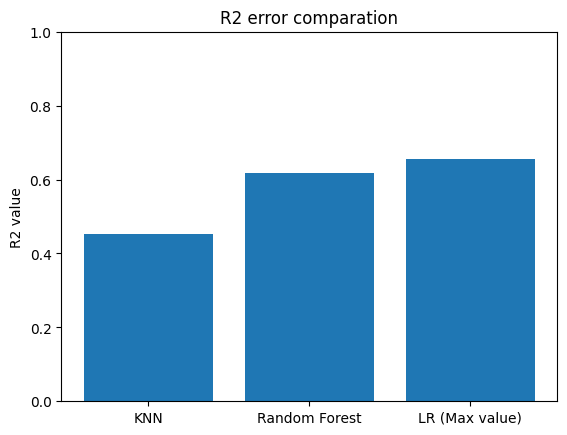

In [ ]:
plt.bar(['KNN','Random Forest','LR (Max value)'],[r2_knn,rf_score,max(r2)])
plt.title('R2 error comparation')
plt.ylabel('R2 value')
plt.ylim(0,1)
plt.show()

The best model for this data is **Random Forest** because the error was the best for all the data, but we got a better prediction for some cases with a Linear Regression.

Unfortunately due the great outliers in the data it is not easy to get a good prediction it would be better to use other IA techniques like Neural Networks.

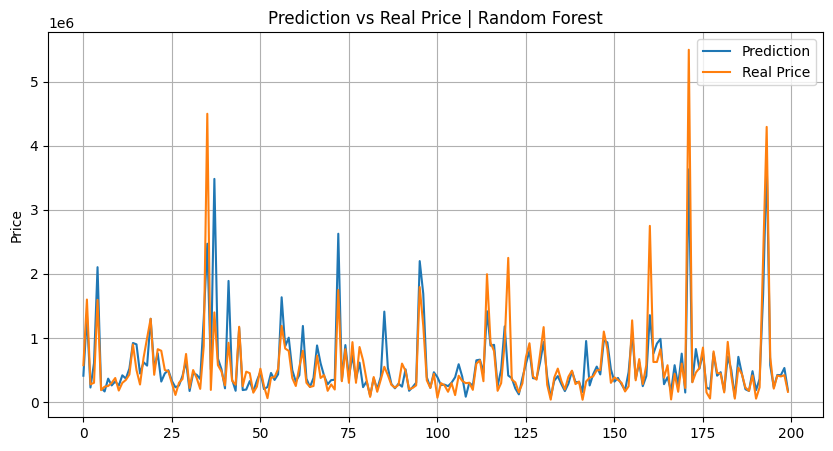

In [ ]:
l = 20

plt.figure(figsize=(10,5))
plt.plot(y_pred_rf[l:l+200],label='Prediction')
plt.plot(list(y_test_rf)[l:l+200],label='Real Price')
plt.title('Prediction vs Real Price | Random Forest')
plt.ylabel('Price')
plt.xlabel('')
plt.legend(loc=1)
plt.grid()
plt.show()

This is an example of 200 cases of Random Forest Price prediction, we can easily see that the prediction in some cases is quite good and effective.

Also the Boxplot shows that the values of the prediction and real prices are very similar for this sample.

Note : It was taken a sample because it is easier to visualize few outliers.

NameError: name 'y_pred_rf' is not defined

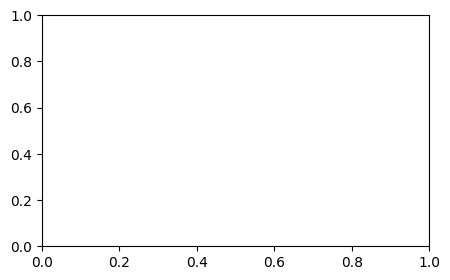

In [3]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot([y_pred_rf[l:l+200],list(y_test_rf)[l:l+200]])#,label='Real Price')
ax.set_title('Prediction vs Real Price | Random Forest')
ax.set_ylabel('Price')
ax.set_xticklabels(['Prediction', 'Real Price'])
plt.grid()
plt.show()